In [96]:
import pandas
import numpy
import matplotlib.pyplot as plt
import specplotlib
from tqdm import tqdm_notebook as tqdm

In [2]:
X_SG = numpy.load('X_SG.npy')
CW = numpy.load('CW.npy')
sn_spec_time = numpy.load('sn_spec_time.npy')
nof_objects = X_SG.shape[0]
SN_df_w_salt_w_class = pandas.read_csv('SN_df_w_salt_w_class.csv')
SN_df_w_salt_w_class.head()

,Unnamed: 0,#SN,zhel,tmax(B),+/-_x,ref.,Dm15,+/-.1_x,ref..1,M_B,...,+/-.4_y,EW5972,EW6355,v6355,Phase,BClass,WClass,z_distmod,alpha,beta
0,0,1994D,0.0029,49432.5,0.1,"B,M,SA,SN",1.37,0.03,B,-99.99,...,NaN,19.7,100.4,-11248.0,-0.1,CN,N,NaN,NaN,NaN
1,1,1994M,0.0232,49474.5,0.9,"B,M,SA,SN",1.26,0.06,B,-19.21,...,0.205,12.8,119.3,-12183.0,1.6,BL,HV,35.121073,0.426293,0.888765
2,2,1994S,0.0151,49518.3,0.3,"B,M,SA,SN",0.94,0.06,B,-19.55,...,0.242,5.1,86.4,-10664.0,0.9,CN,N,34.227370,0.099899,0.949363
3,3,1994T,0.0346,49514.4,0.4,"M,SN",1.51,0.08,SN,-99.99,...,0.189,16.8,159.6,-13459.0,-0.2,BL,HV,36.021113,NaN,NaN
4,4,1994ae,0.0043,49685.5,0.8,"B,M,SA,SN",0.96,0.04,B,-99.99,...,NaN,7.4,81.6,-10979.0,-0.0,CN,N,NaN,NaN,NaN


In [24]:
def get_norm_X(X):
    nof_object = X.shape[0]
    for i in range(nof_objects):
        X[i] = X[i]/numpy.median(X[i])
    return X

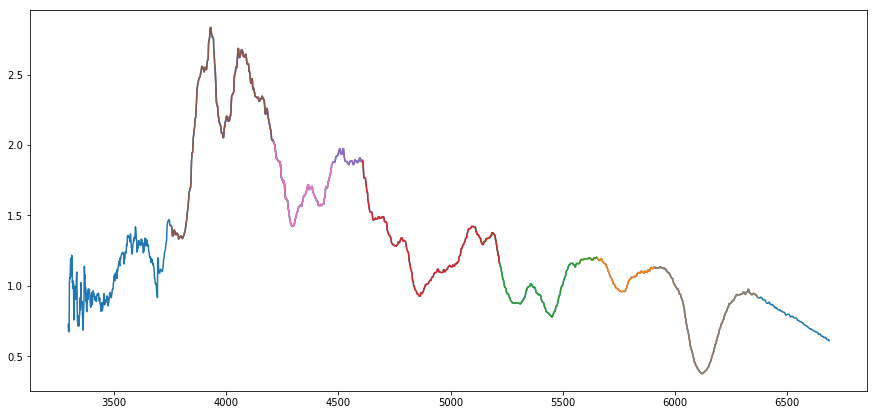

In [6]:
plt.figure(figsize = (15,7))
plt.plot(CW, X_SG[0])

s = 1740
e = 2350
plt.plot(CW[s:e], X_SG[0,s:e])

s = 1380
e = 1800
plt.plot(CW[s:e], X_SG[0,s:e])

s = 1000
e = 1470
plt.plot(CW[s:e], X_SG[0,s:e])

s = 500
e = 1000
plt.plot(CW[s:e], X_SG[0,s:e])

s = 350
e = 750
plt.plot(CW[s:e], X_SG[0,s:e])

s = 700
e = 900
plt.plot(CW[s:e], X_SG[0,s:e])

s = 2000
e = 2350
plt.plot(CW[s:e], X_SG[0,s:e])

plt.show()

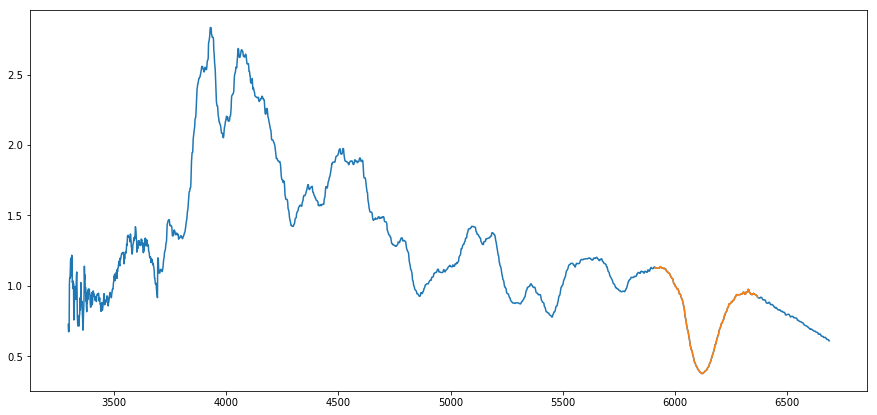

In [74]:
plt.figure(figsize = (15,7))
plt.plot(CW, X_SG[0])



s = 1380
e = 1800

s = 2000
e = 2350
X = X_SG[:,s:e].copy()
wave = CW[s:e].copy()


plt.plot(wave, X[0])



plt.show()

In [75]:
#X_norm = X.copy()
X_norm = get_norm_X(X)

In [76]:
from importlib import reload
reload(specplotlib)

<module 'specplotlib' from '/Users/itamar/git/astro/SNIa/specplotlib.py'>

/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


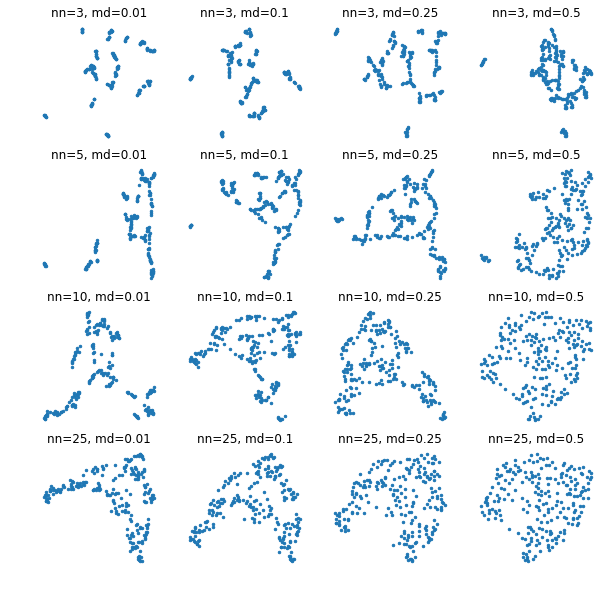

In [77]:
specplotlib.umap_param_scan(X_norm)

In [78]:
import umap

s_umap = umap.UMAP(n_neighbors=10,
                      min_dist=0.01).fit_transform(X_norm)

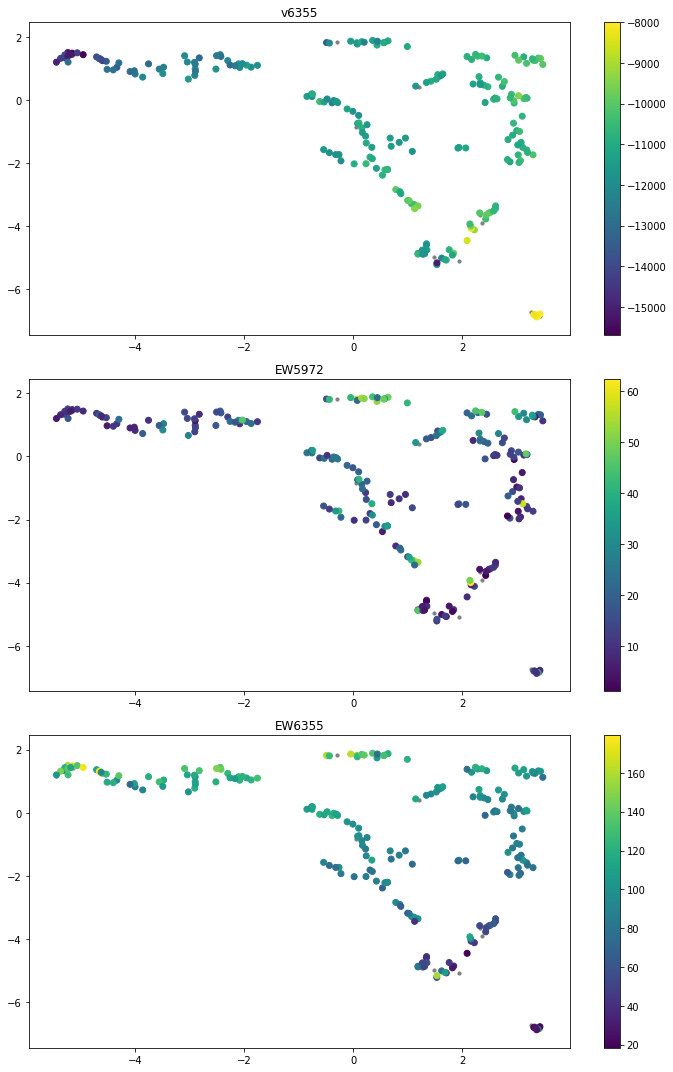

In [79]:
specplotlib.embedding_plot_spec_meas(s_umap, SN_df_w_salt_w_class)

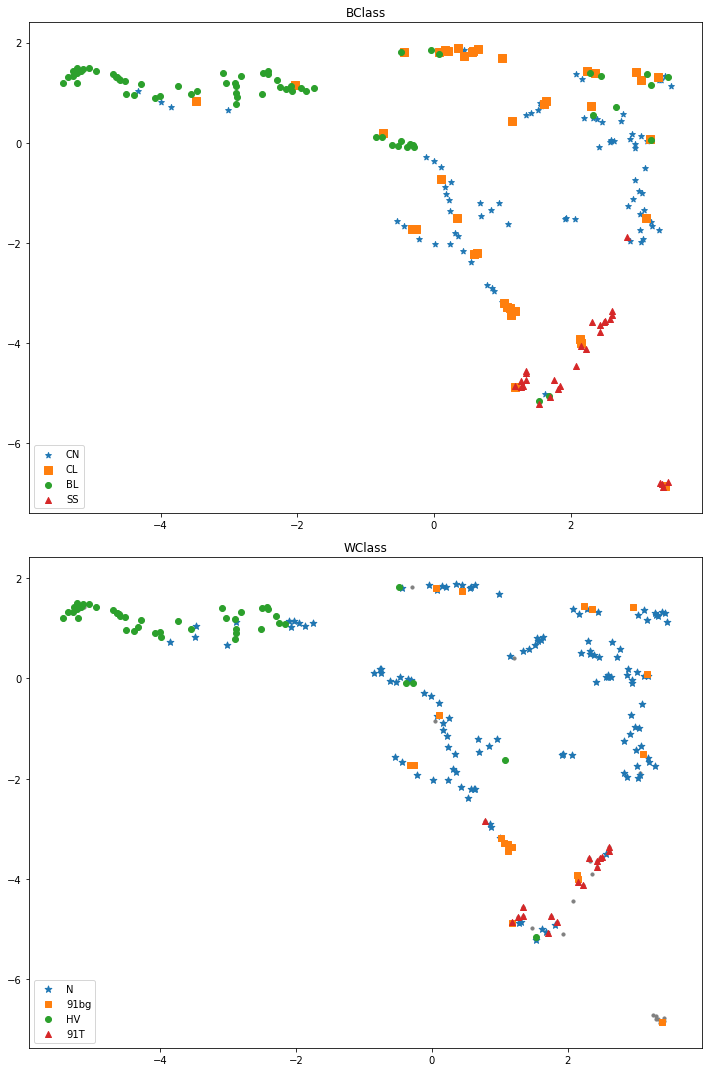

In [80]:
specplotlib.embedding_plot_groups(s_umap, SN_df_w_salt_w_class)

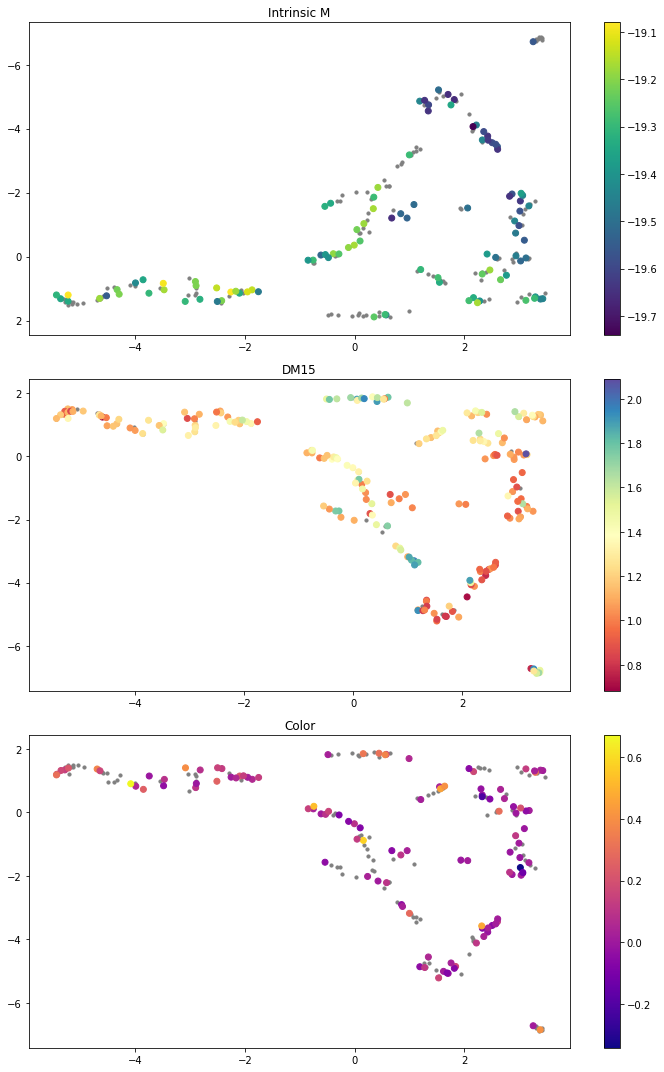

In [81]:
specplotlib.embedding_plot_lc_params(s_umap, SN_df_w_salt_w_class)

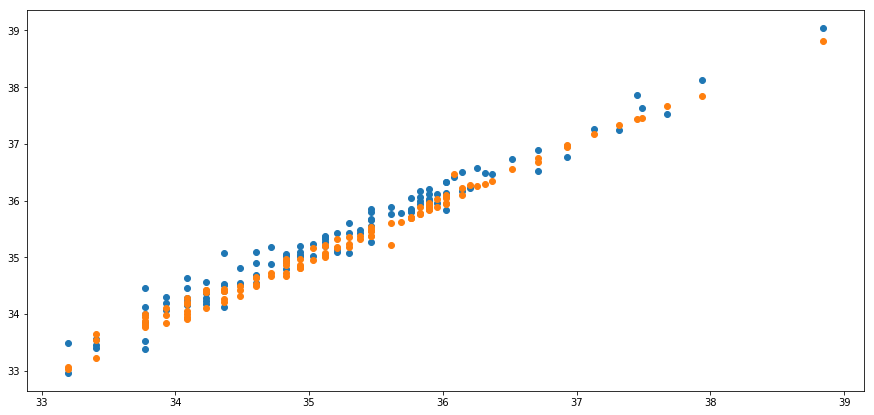

In [90]:
# the different distance moduli we have
from astropy.cosmology import WMAP9 as cosmo

z_CMB_distmod = cosmo.distmod(SN_df_w_salt_w_class['z_CMB'].values)
z_hel_distmod = cosmo.distmod(SN_df_w_salt_w_class['zhel'].values)

mu = SN_df_w_salt_w_class['mu'].values
plt.figure(figsize=(15,7))
plt.scatter(z_CMB_distmod, mu)
plt.scatter(z_CMB_distmod, z_hel_distmod)
plt.show()

In [94]:
SN_df_w_salt_w_class.columns

Index(['Unnamed: 0', '#SN', 'zhel', 'tmax(B)', '+/-_x', 'ref.', 'Dm15',
       '+/-.1_x', 'ref..1', 'M_B', '+/-.2_x', 'B-V', '+/-.3_x', 'Bm-Vm',
       '+/-.4_x', 'Phot.', 'ref..2', 'n_spec', 'RA', 'DEC', 'z_CMB', '+/-_y',
       'm_B', '+/-.1_y', 'x_1', '+/-.2_y', 'c', '+/-.3_y', 'mu', '+/-.4_y',
       'EW5972', 'EW6355', 'v6355', 'Phase', 'BClass', 'WClass', 'z_distmod',
       'alpha', 'beta'],
      dtype='object')

In [102]:
from scipy import optimize

def func(z, *p):
    m0, a, b = z
    x, dx, y, dy = p
    chi2 = (m0 + x[:,0]*a + x[:,1]*b - y)**2
    chi2 = chi2/( (dx[:,0]*a)**2 + (dx[:,1]*b)**2 + dy**2 )
    return numpy.sum(chi2)



def lin_fit(x, dx, y, dy):
    p = (x, dx, y, dy)
    rranges = (slice(19, 19.5, 0.01), slice(0, 0.2, 0.01), slice(-3, -1.5, 0.05))
    resbrute = optimize.brute(func, rranges, args=p, full_output=True, finish=optimize.fmin)
    
    return resbrute[0]

def plot_groups(gs, X, dX, Y, dY):
    
    plt.figure(figsize=(15,12))
    y_plt = Y.copy()
    dy_plt = dY.copy()

    plt.subplot(211)
    x_plt = X[:,0].copy()
    dx_plt = dX[:,0].copy()
    plt.errorbar(x=x_plt, y=y_plt, yerr=dy_plt, xerr=dx_plt, c='gray', alpha = 0.5,  fmt='o')
    for g in gs:
        plt.errorbar(x=x_plt[g], y=y_plt[g], yerr=dy_plt[g], xerr=dx_plt[g],  fmt='o')
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel(r'$x_1$', fontsize = 20)
    plt.ylabel(r'$M_B$', fontsize = 20)

    plt.subplot(212)
    x_plt = X[:,1].copy()
    dx_plt = dX[:,1].copy()
    plt.errorbar(x=x_plt, y=y_plt, yerr=dy_plt, xerr=dx_plt, c='gray', alpha = 0.5,  fmt='o')
    for g in gs:
        plt.errorbar(x=x_plt[g], y=y_plt[g], yerr=dy_plt[g], xerr=dx_plt[g],  fmt='o')
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel(r'$c$', fontsize = 20)
    plt.ylabel(r'$M_B$', fontsize = 20)
    
    plt.tight_layout()
    plt.show()
    
    return
    

def group_fit(g, X, dX, Y, dY, flag_plot = True, flag_color = 'default'):
    
    x_ = X[g].copy()
    dx_ = dX[g].copy()
    y_ = Y[g].copy()
    dy_ = dY[g].copy()
    res = lin_fit(x_, dx_, y_, dy_)
    
    if flag_plot:
        
        
        plt.figure(figsize=(15,12))
        y_plt = Y.copy()
        dy_plt = dY.copy()
        
        plt.subplot(211)
        x_plt = X[:,0].copy()
        dx_plt = dX[:,0].copy()
        plt.errorbar(x=x_plt, y=y_plt, yerr=dy_plt, xerr=dx_plt, c='gray', alpha = 0.5,  fmt='o')
        if flag_color != 'default' :
            plt.errorbar(x=x_plt[g], y=y_plt[g], yerr=dy_plt[g], xerr=dx_plt[g],  fmt='o', c = flag_color)
        
        plt.subplot(212)
        x_plt = X[:,1].copy()
        dx_plt = dX[:,1].copy()
        plt.errorbar(x=x_plt, y=y_plt, yerr=dy_plt, xerr=dx_plt, c='gray', alpha = 0.5,  fmt='o')
        if flag_color != 'default' :
            plt.errorbar(x=x_plt[g], y=y_plt[g], yerr=dy_plt[g], xerr=dx_plt[g],  fmt='o', c = flag_color)
        plt.show()
        
    
    return res

In [103]:
has_m_b = numpy.where(  (numpy.isfinite(SN_df_w_salt_w_class['c'].values)))[0]

Y = SN_df_w_salt_w_class['mu'].values  - SN_df_w_salt_w_class['m_B'].values.copy()
X = numpy.vstack([SN_df_w_salt_w_class['x_1'].values, SN_df_w_salt_w_class['c'].values]).T

dY = numpy.sqrt(SN_df_w_salt_w_class['+/-.4_y'].values.copy()**2  + SN_df_w_salt_w_class['+/-.1_y'].values.copy()**2)
dX = numpy.vstack([SN_df_w_salt_w_class['+/-.2_y'].values, SN_df_w_salt_w_class['+/-.3_y'].values]).T


Yf = Y[has_m_b].copy()
Xf = X[has_m_b].copy()
dYf = dY[has_m_b].copy()
dXf = dX[has_m_b].copy()

from sklearn.metrics.pairwise import euclidean_distances
d_umap = euclidean_distances(s_umap, s_umap)

alpha = numpy.ones(nof_objects)*numpy.nan
beta = numpy.ones(nof_objects)*numpy.nan
m0 = numpy.ones(nof_objects)*numpy.nan

nnn = 10
has_m_b_dmat = d_umap[has_m_b,:][:,has_m_b].copy()
has_m_b_dmat_asort = numpy.argsort(has_m_b_dmat, axis = 1)[:,:nnn]

for i in tqdm(range(len(has_m_b))):
    g                 = has_m_b_dmat_asort[i]
    inter, a, b       = group_fit(g, Xf, dXf, Yf, dYf, flag_plot=False)
    alpha[has_m_b[i]] = a
    beta[has_m_b[i]]  = b
    m0[has_m_b[i]]    = inter

/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in less


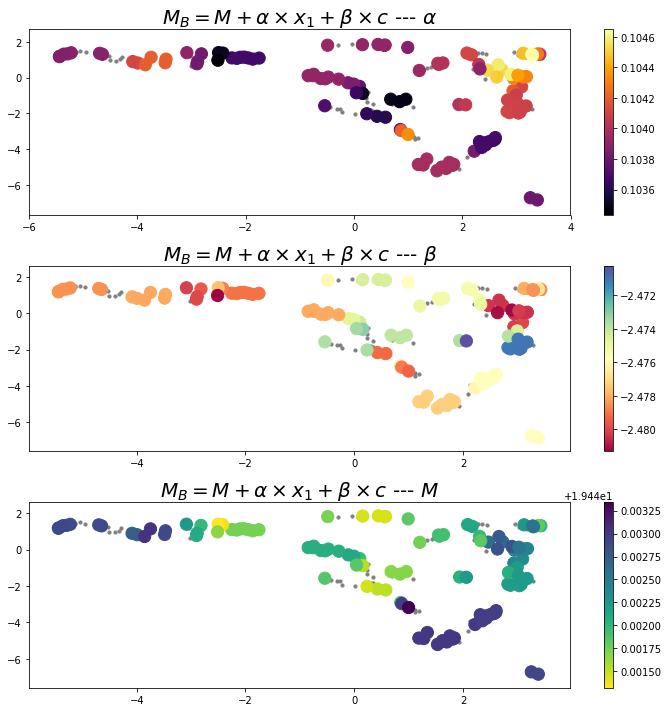

In [104]:
x = s_umap[:, 0]
y = s_umap[:, 1]

plt.figure(figsize=(10,10))


plt.subplot(311)
plt.title(r'$M_{B} = M + \alpha \times x_1 + \beta \times c$ --- $\alpha$', fontsize = 20 )

plt.scatter(x, y, color = 'gray', s = 10)
#plt.scatter(x[iax_in_df_idx], y[iax_in_df_idx], color ='orange', s= 200, marker='*')
#plt.scatter(x, y, c = t)
t = alpha.copy()
#t = SN_df_w_salt_w_class['c'].values.copy()
#cut = 0.2
#t[t > cut] = cut
plt.scatter(x, y, c = t, cmap = 'inferno', s = 150)
plt.colorbar()
plt.tight_layout()

plt.subplot(312)
plt.title(r'$M_{B} = M + \alpha \times x_1 + \beta \times c$ --- $\beta$', fontsize = 20 )


plt.scatter(x, y, color = 'gray', s = 10)
#plt.scatter(x[iax_in_df_idx], y[iax_in_df_idx], color ='orange', s= 200, marker='*')
#plt.scatter(x, y, c = t)
t = beta.copy()
#cut = 6
#t[t < cut] = cut
#cut = 0.2
#t[t > cut] = cut
plt.scatter(x, y, c = t, cmap = 'Spectral', s = 150)
plt.colorbar()

plt.subplot(313)
plt.title(r'$M_{B} = M + \alpha \times x_1 + \beta \times c$ --- $M$', fontsize = 20 )

plt.scatter(x, y, color = 'gray', s = 10)
#plt.scatter(x[iax_in_df_idx], y[iax_in_df_idx], color ='orange', s= 200, marker='*')
#plt.scatter(x, y, c = t)
t = m0.copy()
#cut = 6
#t[t < cut] = cut
cut = 19.25
t[t < cut] = cut
plt.scatter(x, y, c = t, cmap = 'viridis_r', s = 150)

plt.colorbar()
plt.tight_layout()
plt.show()